# Data Cleaning

## Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read data

In [2]:
# read data into csv
data = pd.read_csv("../dataset/classification_data.csv")

In [3]:
data.head(1)

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,...,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,586266,1,1,18,4,2,1049,1,2,4,...,4,2,21,3,1,1,3,1,1,1


In [4]:
# check data size
data.shape

(1000, 22)

## check data types

In [5]:
data.dtypes

user_id                              int64
label                                int64
Account type                         int64
Duration of Credit (month)           int64
Payment Status of Previous Credit    int64
Purpose                              int64
Credit Amount                        int64
Savings type                         int64
Length of current employment         int64
Instalment per cent                  int64
Marital Status                       int64
Guarantors                           int64
Duration in Current address          int64
Most valuable available asset        int64
Age                                  int64
Concurrent Credits                   int64
Type of apartment                    int64
No of Credits at this Bank           int64
Occupation                           int64
No of dependents                     int64
Telephone                            int64
Foreign Worker                       int64
dtype: object

**Observation**

All features are numerical dtypes


**CATEGORICAL FEATURES:**

**Ordinal Categorical features**
- Payment Status of Previous Credit
- Most valuable available asset

**Nominal Categorical features**
- Account Type.
- Purpose.
- Savings Type.
- Type of Apartment
- Marital Status.
- Occupation.
- Foreign Worker.

The ordinal categorical features can be left as label encoded numerical data, but the nominal categorical features has to be converted to strings and apply one-hot encoding technique to it

## Convert nominal categorical features to object dtypes

In [6]:
nominal_cols = ["Account type","Purpose","Savings type","Type of apartment",
               "Marital Status","Occupation","Foreign Worker"]

In [7]:
for feature in nominal_cols:
    data[feature] = data[feature].astype(object)

In [8]:
data.dtypes

user_id                               int64
label                                 int64
Account type                         object
Duration of Credit (month)            int64
Payment Status of Previous Credit     int64
Purpose                              object
Credit Amount                         int64
Savings type                         object
Length of current employment          int64
Instalment per cent                   int64
Marital Status                       object
Guarantors                            int64
Duration in Current address           int64
Most valuable available asset         int64
Age                                   int64
Concurrent Credits                    int64
Type of apartment                    object
No of Credits at this Bank            int64
Occupation                           object
No of dependents                      int64
Telephone                             int64
Foreign Worker                       object
dtype: object

## Check for missing values

In [9]:
data.isnull().sum()

user_id                              0
label                                0
Account type                         0
Duration of Credit (month)           0
Payment Status of Previous Credit    0
Purpose                              0
Credit Amount                        0
Savings type                         0
Length of current employment         0
Instalment per cent                  0
Marital Status                       0
Guarantors                           0
Duration in Current address          0
Most valuable available asset        0
Age                                  0
Concurrent Credits                   0
Type of apartment                    0
No of Credits at this Bank           0
Occupation                           0
No of dependents                     0
Telephone                            0
Foreign Worker                       0
dtype: int64

No missing values

## check for duplicates using the user_id

In [10]:
data["user_id"].nunique()

1000

Data has 1000 unique user_id and 1000 records of data, showing the absence of duplicate entries

## Remove redundant features 

In [11]:
data = data.drop(["user_id", "Telephone"], axis = 1)

In [12]:
data.head()

,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,1,4,2,21,3,1,1,3,1,1
1,1,1,9,4,0,2799,1,3,2,3,1,2,1,36,3,1,2,3,2,1
2,1,2,12,2,9,841,2,4,2,2,1,4,1,23,3,1,1,2,1,1
3,1,1,12,4,0,2122,1,3,3,3,1,2,1,39,3,1,2,2,2,2
4,1,1,12,4,0,2171,1,3,4,3,1,4,2,38,1,2,2,2,1,2


## check descriptive statistics

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
label,1000.0,0.700,0.458487,0.0,0.0,1.0,1.00,1.0
Duration of Credit (month),1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0
Payment Status of Previous Credit,1000.0,2.545,1.083120,0.0,2.0,2.0,4.00,4.0
Credit Amount,1000.0,3271.248,2822.751760,250.0,1365.5,2319.5,3972.25,18424.0
Length of current employment,1000.0,3.384,1.208306,1.0,3.0,3.0,5.00,5.0
Instalment per cent,1000.0,2.973,1.118715,1.0,2.0,3.0,4.00,4.0
Guarantors,1000.0,1.145,0.477706,1.0,1.0,1.0,1.00,3.0
Duration in Current address,1000.0,2.845,1.103718,1.0,2.0,3.0,4.00,4.0
Most valuable available asset,1000.0,2.358,1.050209,1.0,1.0,2.0,3.00,4.0
Age,1000.0,35.542,11.352670,19.0,27.0,33.0,42.00,75.0


No Anomaly was noticed from the descriptive statistics

In [14]:
data.columns

Index(['label', 'Account type', 'Duration of Credit (month)',
       'Payment Status of Previous Credit', 'Purpose', 'Credit Amount',
       'Savings type', 'Length of current employment', 'Instalment per cent',
       'Marital Status', 'Guarantors', 'Duration in Current address',
       'Most valuable available asset', 'Age', 'Concurrent Credits',
       'Type of apartment', 'No of Credits at this Bank', 'Occupation',
       'No of dependents', 'Foreign Worker'],
      dtype='object')

## Outlier detection

In [15]:
features = ["Duration of Credit (month)",'Credit Amount','Length of current employment','Instalment per cent',
'Guarantors','Duration in Current address', 'Age', 'Concurrent Credits','No of Credits at this Bank', 'No of dependents']

In [16]:
def create_hist_plot(data_frame, feature_list):
    num_features = len(feature_list)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10,8))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate over each feature and create a boxplot
    for i, feature in enumerate(feature_list):
        ax = axes[i]
        sns.histplot(data_frame[feature], color='skyblue',ax=ax)
        plt.title(f'Distribution of {feature}')
        plt.xlabel(feature)
        plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

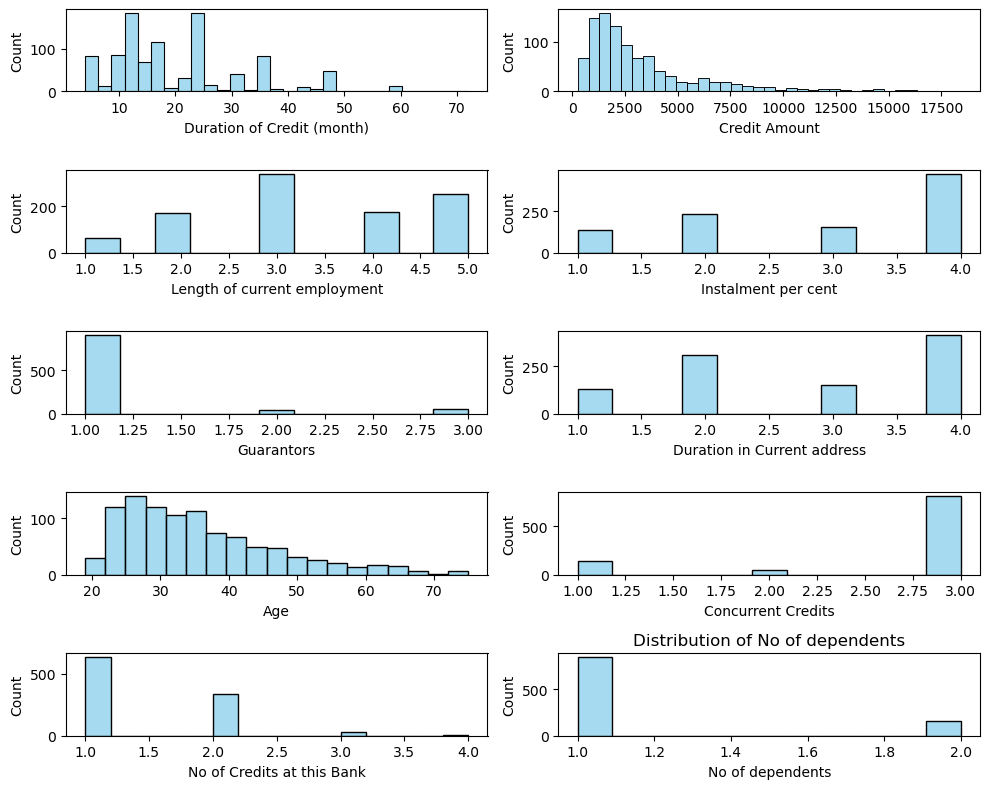

In [17]:
create_hist_plot(data_frame= data, feature_list= features)

In [18]:
def create_box_plot(data_frame, feature_list):
    num_features = len(feature_list)
    num_rows = (num_features + 1) // 2
    
    fig, axes = plt.subplots(num_rows, 2, figsize=(10,8))
    
    # Flatten the axes array for easy iteration
    axes = axes.flatten()
    
    # Iterate over each feature and create a boxplot
    for i, feature in enumerate(feature_list):
        ax = axes[i]
        sns.boxplot(data_frame[feature], color='skyblue',ax=ax, orient = "h")
        ax.set_title(f'Distribution of {feature}')
        ax.set_xlabel(feature)
        ax.set_ylabel('Count')
    plt.tight_layout()
    plt.show()

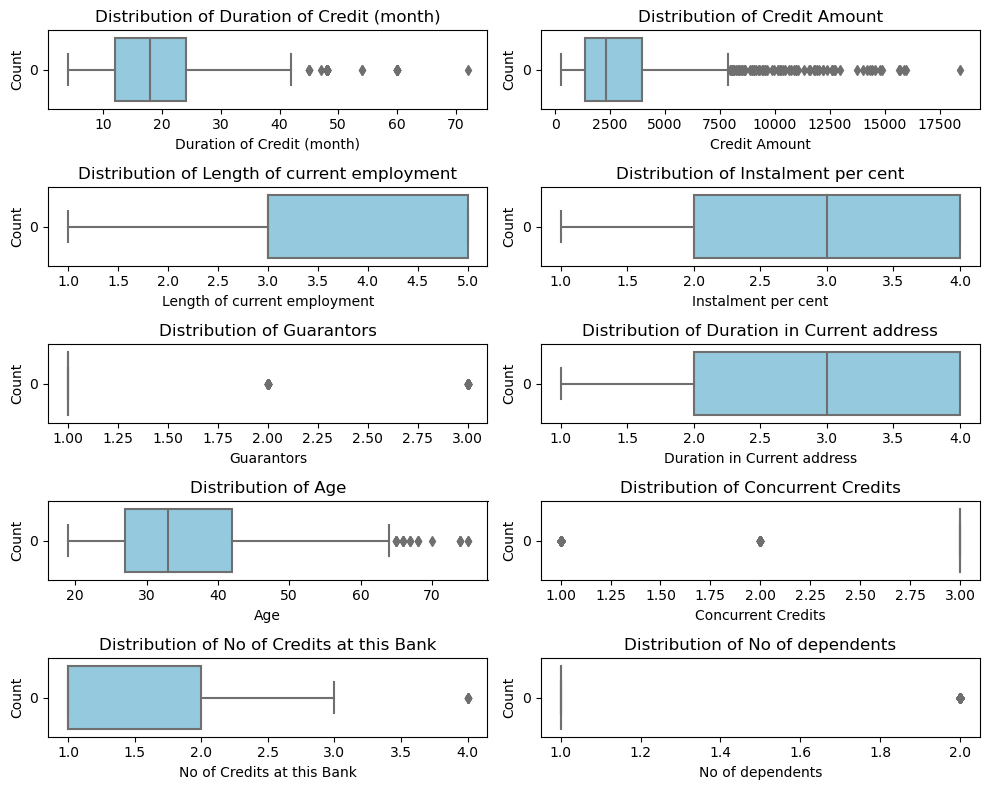

In [19]:
create_box_plot(data_frame= data, feature_list= features)

**Observation**

Features with outliers are: 
- Duration of credits (month)
- Credit Amount
- Age

## Remove Outliers

In [20]:
def remove_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    
    # Calculate the IQR
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap values above the upper bound at the upper bound
    df[column_name] = df[column_name].apply(lambda x: min(x, upper_bound))
    
    return df

In [21]:
data = remove_outliers(df= data, column_name="Duration of Credit (month)")
data = remove_outliers(df= data, column_name="Age")
data = remove_outliers(df= data, column_name="Credit Amount")

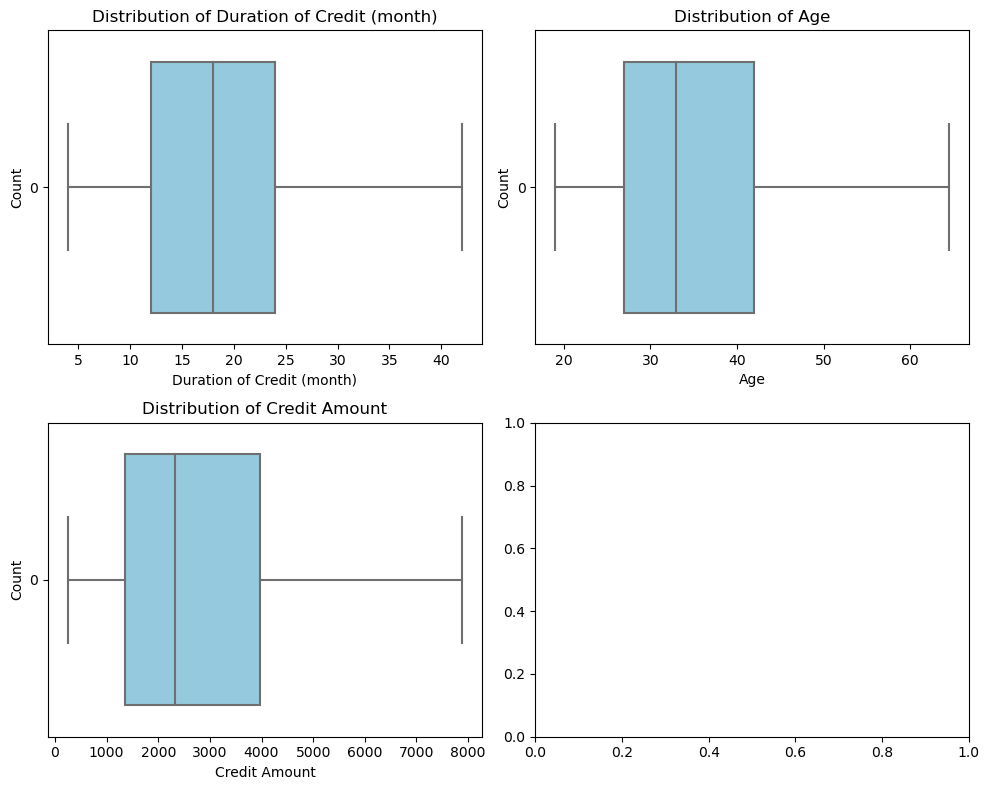

In [22]:
create_box_plot(data_frame=data, feature_list=["Duration of Credit (month)","Age","Credit Amount"])

## Save final data

In [23]:
data.to_csv("../dataset/Clean_data.csv", index = False)

## Data Cleaning Config

- change nominal features to object string:
    - "Account type",
    - "Purpose",
    - "Savings type",
    - "Type of apartment",
    - "Marital Status",
    - "Occupation",
    - "Foreign Worker"
    
    
- ordinal categorical features:
    - Payment Status of Previous Credit
    - Most valuable available asset
    
    
- Numerical features include:
    - "Duration of Credit (month)"
    - 'Credit Amount'
    - 'Length of current employment'
    - 'Instalment per cent'
    - 'Guarantors'
    - 'Duration in Current address'
    - 'Age'
    - 'Concurrent Credits'
    - 'No of Credits at this Bank'
    - 'No of dependents'
    - 'labels'


- Columns with outliers
    - Duration of credits (month), 
    - Credit Amount, 
    - Age

In [24]:
data.shape

(1000, 20)